# Introduction to Neural Networks

## Import packages

In [1]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Understanding the image data format

In [4]:
X_train[0].shape

(28, 28)

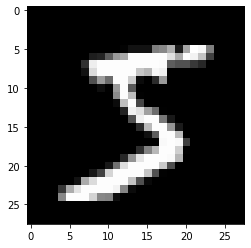

In [5]:
plt.imshow(X_train[0],cmap='gray')

In [6]:
y_train[0]

5

## Preprocessing the image data

In [7]:
image_height,image_width = 28,28

In [8]:
X_train = X_train.reshape(60000, image_height*image_width)
X_test = X_test.reshape(10000, image_height*image_width)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [9]:
print(X_train[0])
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [10]:
X_train /= 255.0
X_test /= 255.0
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [11]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [12]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


## Build a model

![NeuralNet](images/neural-net.png)

In [13]:
model = Sequential()

In [14]:
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10,activation='softmax'))

## Compile the model

In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [17]:
784*512+512

401920

In [18]:
512*512+512

262656

In [19]:
512*10+10

5130

## Train the model

In [20]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1837 - accuracy: 0.9442 - val_loss: 0.0946 - val_accuracy: 0.9717
Epoch 2/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0811 - accuracy: 0.9749 - val_loss: 0.0852 - val_accuracy: 0.9744
Epoch 3/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0550 - accuracy: 0.9825 - val_loss: 0.0945 - val_accuracy: 0.9712
Epoch 4/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0422 - accuracy: 0.9862 - val_loss: 0.0814 - val_accuracy: 0.9763
Epoch 5/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0337 - accuracy: 0.9889 - val_loss: 0.0947 - val_accuracy: 0.9758
Epoch 6/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0296 - accuracy: 0.9904 - val_loss: 0.0792 - val_accuracy: 0.9792
Epoch 7/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0248 - accuracy: 0.9923 - val_loss: 0.0862 - val_ac

## What is the accuracy of the model?

### Plot the accuracy of the training model

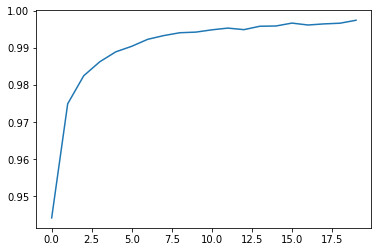

In [22]:
plt.plot(history.history['accuracy'])

### Plot the accuracy of training and validation set

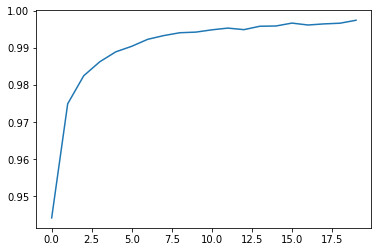

In [23]:
plt.plot(history.history['accuracy'])

### Accuracy of training and validation with loss

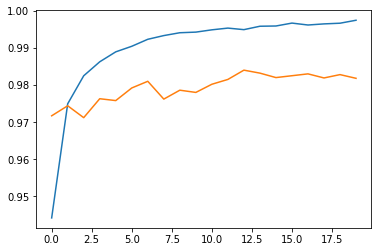

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

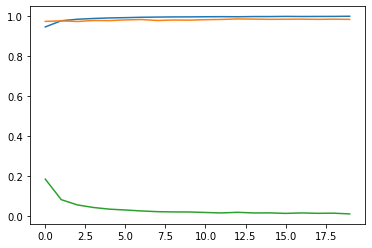

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])

## Evaluating the model

In [26]:
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1471 - accuracy: 0.9818


In [27]:
score

[0.14713658392429352, 0.9818000197410583]

# Convolution Neural Network

## Import the libraries

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

## Load the data

In [29]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [30]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Pre-processing

In [32]:
batch_size = 128
num_classes = 10
epochs = 3

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test, num_classes)


In [33]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


## Use the model

In [34]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3,3),input_shape=(28,28,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(32, kernel_size=(3,3),padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dense(10,activation='softmax'))
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(cnn.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense_3 (Dense)             (None, 64)               

In [35]:
history_cnn = cnn.fit(X_train,y_train,epochs=20,verbose=1,validation_data=(X_train,y_train))

Epoch 1/20
1875/1875 [==============================] - 75s 40ms/step - loss: 1.0020 - accuracy: 0.6520 - val_loss: 0.3642 - val_accuracy: 0.8899
Epoch 2/20
1875/1875 [==============================] - 74s 40ms/step - loss: 0.3226 - accuracy: 0.9016 - val_loss: 0.2779 - val_accuracy: 0.9157
Epoch 3/20
1875/1875 [==============================] - 74s 40ms/step - loss: 0.2531 - accuracy: 0.9233 - val_loss: 0.2263 - val_accuracy: 0.9294
Epoch 4/20
1875/1875 [==============================] - 74s 40ms/step - loss: 0.2131 - accuracy: 0.9350 - val_loss: 0.1891 - val_accuracy: 0.9423
Epoch 5/20
1875/1875 [==============================] - 74s 40ms/step - loss: 0.1831 - accuracy: 0.9437 - val_loss: 0.1713 - val_accuracy: 0.9468
Epoch 6/20
1875/1875 [==============================] - 73s 39ms/step - loss: 0.1631 - accuracy: 0.9490 - val_loss: 0.1434 - val_accuracy: 0.9560
Epoch 7/20
1875/1875 [==============================] - 75s 40ms/step - loss: 0.1458 - accuracy: 0.9545 - val_loss: 0.1363 -

Recall that when using neural networks we got good accuracy.

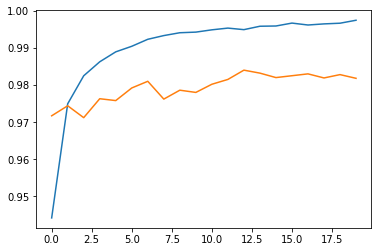

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

Comparing this to using CNNs - the performance is far superior.

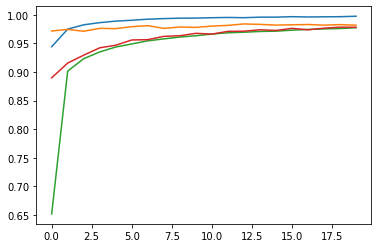

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])